<a href="https://colab.research.google.com/github/Orasz/Flood-Modelling/blob/main/Flood_Estimation_statistical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flood estimation practical**

Welcome to our flood estimation practical!

### **Some important background information...**

We will be doing our analysis using the programming language python. Learning how to code in python is incredibly useful- you can basically do anything you can dream of with it! If you have not used python before, lean more about it on my beginners page here: https://colab.research.google.com/drive/10LWqsq495oJqrQ3k93d5pqFrwGN9rs9p?usp=sharing

We are running python on computers (owned by google) in the cloud (this is called colab). We are running python like this so that no one has to install python of their own computers (although you can totally do that if you would like to). You can find information on how to do this on the beginners page.

If this is your first taste of python and discover that you LOVE it and want to learn more, ask Liz Lewis to add you to modules CEG8501 and CEG8526 so that you can access all of the python material we learn on the hydrology MSc.

I will explain what the code is doing by writing comments in the code. Comments look like this:

`# this is a comment- hi there!`


Now let's get to the actual hydrology....



**Aim**: 

To estimate the 10,50 and 100 year return period (1,2,10 % AEP) flood discharges for the Kendal at Victoria Bridge

**Data**: 

40 years of recorded annual maxima in file 73012.txt – these data are provided with further background info at https://nrfa.ceh.ac.uk/data/station/peakflow/73012

**Method**: 
- Load in the annual maximum flow data
- Fit a GEV distribution (using MLE) to your data and outputs the parameters 
- Plot the observations against the reduced variate and return period 
- Plot the fitted flow estimates against the reduced variate and return period 


**Analysis**: 

- You can read off the 1,2,10 % AEP flood discharges from the fitted GEV distribution, or calculate them directly.
- To estimate the uncertainty associated with these values you can follow a jack-knife procedure. You can do this easily by  removing one or more values, then re-fitting the GEV distribution. Edits could include: - remove the largest value, remove the 2nd largest value etc. or using only the last ten years, twenty years etc. Here we show you how to systematically remove each data point in turn.
- For the coursework: use a systematic procedure of editing the annual maximum record to obtain an ensemble of possible records and use these to estimate the uncertainty associated with the 1% AEP estimate.

## **A note on Python modules**

There is so much that we can do with python that if python were to make all functions available to us straight away, it would take forever to load! Insead what python does in load a core set of function and then we have to specify what other functions we want available to us. This optional extra functionality is stored in 'modules'. Modules often have to be separately installed to python. Fortunately, google colab has everything we need already installed on their servers so all we have to do is make sure that we import it into our script. 

If you have installed python on your own machine, then you may need to install some of these extra packages. Distributions like anaconda (which I recommed you install instead of the basic version of python) come with a lot of these packagaes pre- installed saving us some faff. 

The most common pacages that we will be using later in the course will be: 

*   Pandas: Python's module for data analysis. It works with dataframes as its key type of object.
*   Numpy: Python's module for working with numbers. It works with arrays (think matrices/vectors), basically a fancy list. 
*   Matplotlib: Python's module for creating graphs and plots

There are plenty of others that we will be working with too. 

In [1]:
# Let's import the modules that we will need to use in this practical
import pandas as pd # this module lets us work with tables of data (called dataframes)
import numpy as np # this module lets us do maths
import matplotlib.pyplot as plt # this module lets us plot graphs
from scipy.stats import genextreme as gev # this is the module we need to fit the GEV distribution

## **Loading in data**

The first thing we need to do is read in some data.

The pd.read_csv() function has lots of extra keyword arguments that let us read in our data in a flexible way.

We will be working with data from the Kendal at Victoria Bridge. The data describes the Annual Maximum Flow.

You will need the following files:

    73012.txt

First we have to upload these to google's cloud computer

In [36]:
from google.colab import files
uploaded = files.upload()
# uploading as we did in WB1. 
# You can also just drag these files to the folder button on the left.

Saving output.txt to output.txt


In [44]:
# read the dataset into pandas
# Our files will typically be csv (comma separated vales) or text files, so we use the read_csv function
# This function comes with lots of optional arguments that we can use to read our data in the correct format
# we are reading our data in to be a pandas dataframe that we can them use for lots of different analysis.

# we have to give each dataset a variable name, choose something descriptive!
# Here we read in  flow data, so I have called it flow_df
# the first argument we pass the function read_csv is the file name
# then we add other keyword arguments as needed. 
# Here I want to tell pandas that the file contains no headers, and so I would like to use the column name "amax"
flow_df = pd.read_csv('output.txt', header=None, names=["amax"])

# We can then take a look at our new dataframe! 
flow_df

,amax
0,158.3
1,127.3
2,149.0
3,173.8
4,271.6
...,...
84,187.4
85,149.8
86,102.0
87,164.8


yeah, it's not a very exciting dataframe, but it is correct and nicely labelled.

Now that we have our amax data, we can fit a GEV distribution to it.

## **Fit GEV distribution** 

Fitting a GEV distribution to it will return the shape, location and scale parameters of the distribution.


(You don't have to only fit a GEV distributions! Depending on the time series, other distributions might be more appropriate. See the 'fitting distributions with python section of this notebook: https://colab.research.google.com/drive/1KPeFL5e6A5i27c2eBqim4nKb7i5nT4Lc?usp=sharing)

In [45]:
# fit GEV (it's pretty simple to do right?!)

shape, loc, scale = gev.fit(flow_df.amax) # only one line of code!
rmed = 1 #Here we have set Rmed to 1, but you could use a representative estimate from a pooled series.
shape, loc, scale # show the parameters below

(0.09542418206791886, 150.30547126498988, 26.30257609380645)

Note: The .exe program provided by Chris to use with excel gives

u (location) = 128.341
a (scale) = 40.239
k (shape) = -0.153

so you may get slightly different estimates depending on which computer program you use (the .exe uses L-moments to fit the GEV distribution, python uses MLE).


Now we want to be able to compare our fitted and observed distributions. We want to plot our flow values agains the reduced variate and return period. So we need to calculate these now.


In [46]:
flow_df["obs_rank"] = flow_df.amax.rank(method="first", ascending=True) # Calculating the reduced variate requires the rank of the measurement (i.e. is it the 4th smallest value?). We use the rank function to calculate this. ascending=False as the smallest value should have rank=1. method=first means that there are no tied ranks
num_obs = flow_df.obs_rank.max() # This gives us the total number of observations 
flow_df["F"] = (flow_df.obs_rank -0.44)/(flow_df.obs_rank.max() +0.12) # The non-exceedence probability, a step to calculate the reduced variate, y.
flow_df["y"] = -1*np.log(-1*np.log(flow_df.F)) # calculating the reduced variate
flow_df #take a look

,amax,obs_rank,F,y
0,158.3,44.0,0.488779,0.334292
1,127.3,8.0,0.084829,-0.903048
2,149.0,29.0,0.320467,-0.129252
3,173.8,63.0,0.701975,1.038860
4,271.6,89.0,0.993716,5.066652
...,...,...,...,...
84,187.4,75.0,0.836625,1.723841
85,149.8,30.0,0.331688,-0.098543
86,102.0,1.0,0.006284,-1.623302
87,164.8,52.0,0.578546,0.602872


In [47]:
# now we can do the same with our simulated (fitted GEV) estimates 
sim_df = pd.DataFrame({"F": np.linspace(0.01, 0.99, 99)}) #create a new dataframe for the simulated values
sim_df["y"] = -1*np.log(-1*np.log(sim_df.F))# create the reduced variates we want to estimate flows for
sim_df["GEV"] = rmed*(loc+(scale*(1-(-1*np.log(sim_df.F))**shape)/shape)) #estimate the flows using the fitted GEV parameters that we calculated earlier
sim_df # take a look

,F,y,GEV
0,0.01,-1.527180,107.062306
1,0.02,-1.364055,111.987606
2,0.03,-1.254635,115.248660
3,0.04,-1.169032,117.776259
4,0.05,-1.097189,119.881710
...,...,...,...
94,0.95,2.970195,218.333871
95,0.96,3.198534,222.808574
96,0.97,3.491367,228.406277
97,0.98,3.901939,235.995856


Text(0, 0.5, 'Flow ($m^3/s$)')

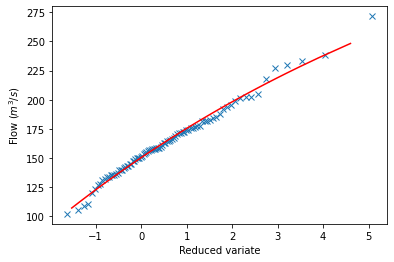

In [48]:
# Let's make a graph!!!
# This is the simplest way to take a look at the data

plt.plot(flow_df.y, flow_df.amax, "x", label="obs") # plot the observed flows (confusingly we want the reduced variate, y, on the x axis)
plt.plot(sim_df.y, sim_df.GEV, "r-", label="GEV") # plot the estimated flows

plt.xlabel("Reduced variate") #always label your axes!
plt.ylabel(r"Flow ($m^3/s$)")

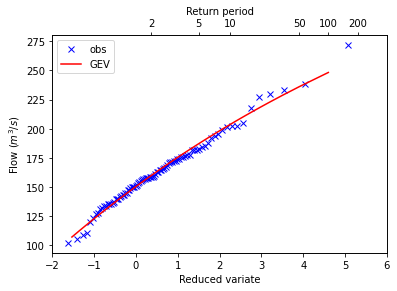

In [49]:
# The reduced variate is quite hard to interpret, so we can plot the return period on a separate axis
# Unfortunately, this requires a bit more code which can look quite intimidating as matplotlib can get quite complex
# Feel free to ignore this, but if you would like to learn more about what is going on here see: https://colab.research.google.com/drive/1N71qPp8QOonyU2a-Czg5VszMZADdYzrW?usp=sharing


fig, ax1 = plt.subplots() # create axes for plotting the reduces variate

ax1.plot(flow_df.y, flow_df.amax, "bx", label="obs") # plot our observed data
ax1.plot(sim_df.y, sim_df.GEV, "r-", label="GEV") # plot our fitted data

ax1.set_xlabel("Reduced variate") # label the axes
ax1.set_ylabel(r"Flow ($m^3/s$)")
ax1.legend()

# we have to mess around a bit to plot the return periods on a twin axis

ax2 = ax1.twiny() # create a twin axis at the top
ax1.set_xlim(-2, 6) # set both x axes to have the same extent
ax2.set_xlim(-2, 6)
ax2.set_xticks([0.37, 1.5, 2.25, 3.9, 4.6, 5.3]) # these reduced variates are equivalent to...
ax2.set_xticklabels([2, 5, 10, 50, 100, 200]) # ...these return periods
ax2.set_xlabel("Return period")

plt.show()

## **Estimating return period flows**

In [50]:
# We can calculate an estimate of flow for any return period by plugging it into the equation:
# T = 1/(1-F)
# Therefore:
T = 100 # change this value to explore other return period estimates
F = 1- (1/T)
flow_estimate = rmed*(loc+(scale*(1-(-1*np.log(F))**shape)/shape))
flow_estimate

248.23898482913268

# **Estimating uncertainty**

Now for something really cool....

Extreme value distribution fit is very sensitive to the length of the record  (the number of observations). What if we had a few more years of data? How would that change the parameters of the GEV distribution? And how would that change out estimate of the 100 year flood?

We can investigate this uncertainty by repeatedly leaving out one of the amax values, then going through the proceedure of fitting a GEV many times on different subsets of our observations. By doing this, we can get a feeling for how variable our estimates of peak flows are. This is a process known as jack-knifing.

In [51]:
def fit_and_calc(subset, returnPeriod): # this function will fit the GEV and calculate the 100 year return period. It's a shorthand version of what we did already. By creating a function, we can reuse this bit of code loads of times!
  shape, loc, scale = gev.fit(subset)
  rmed = 1
  F = 1- (1/returnPeriod)
  flow_estimate = rmed*(loc+(scale*(1-(-1*np.log(F))**shape)/shape))
  return flow_estimate

flow_estimates = [] # this is where we will store our jack-knife estimates of flow
for i in range(1, int(num_obs+1), 1): # this loop lets us leave out a value each time
  flow_estimates.append(fit_and_calc(flow_df.amax.loc[flow_df.obs_rank != i], 100)) # this is where we call the function and get our estimate

flow_estimates # lets look at all of our different estimates for the 100 year flood


[249.21056692336253,
 248.7222063746022,
 248.36565822780744,
 248.2704800696608,
 248.0660576246255,
 248.07788693507666,
 248.12444946802532,
 248.12862245207313,
 248.19379027927084,
 248.20556774052756,
 248.25546576648097,
 248.25546576648097,
 248.27729182395026,
 248.27729182395026,
 248.28856397897096,
 248.29932974610387,
 248.32200712728041,
 248.37634683633118,
 248.3810196528909,
 248.3810196528909,
 248.41337432193495,
 248.4337350894886,
 248.46076556504,
 248.4630395618757,
 248.49613426049498,
 248.50307831620287,
 248.54543762311403,
 248.56183442652485,
 248.58605107484004,
 248.60183496532716,
 248.60343557338416,
 248.60539767404444,
 248.62249678987286,
 248.64036829138553,
 248.65911707070308,
 248.68471672713554,
 248.69686784244107,
 248.7009803840447,
 248.71602413686966,
 248.71761989666587,
 248.7240004648776,
 248.73123536183425,
 248.73123536183425,
 248.7348465011663,
 248.7348465011663,
 248.73932467988595,
 248.742378525007,
 248.76175768471677,
 248.774

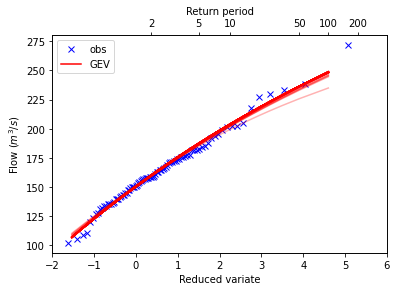

In [52]:
# We can also plot all of those new distributions so we can really see how leaving each value out is impacting the fit of the distribution

# This is all code that we have seen above to plot the graph
sim_df = pd.DataFrame({"F": np.linspace(0.01, 0.99, 99)}) #create a new dataframe for the simulated values
sim_df["y"] = -1*np.log(-1*np.log(sim_df.F))# create the reduced variates we want to estimate flows for
sim_df["GEV"] = rmed*(loc+(scale*(1-(-1*np.log(sim_df.F))**shape)/shape)) #estimate the flows using the fitted GEV parameters that we calculated earlier

fig, ax1 = plt.subplots()
ax1.plot(flow_df.y, flow_df.amax, "bx", label="obs")
ax1.plot(sim_df.y, sim_df.GEV, "r-", label="GEV")
ax1.set_xlabel("Reduced variate")
ax1.set_ylabel(r"Flow ($m^3/s$)")
ax1.legend()

# we have to mess around a bit to plot the return periods on a twin axis
ax1.set_xlim(-2, 6)
ax2 = ax1.twiny()
ax2.set_xlim(-2, 6)
ax2.set_xticks([0.37, 1.5, 2.25, 3.9, 4.6, 5.3]) # these reduced variates are equivalent to...
ax2.set_xticklabels([2, 5, 10, 50, 100, 200]) # ...these return periods
ax2.set_xlabel("Return period")



def fit_and_plot(subset): # this function will fit the GEV and calculate the 100 year return period. It's a shorthand version of what we did already.
  shape, loc, scale = gev.fit(subset)
  rmed = 1
  sim_df["GEV_2"] = rmed*(loc+(scale*(1-(-1*np.log(sim_df.F))**shape)/shape)) #estimate the flows using the fitted GEV parameters fitted to the subset
  ax1.plot(sim_df.y, sim_df.GEV_2, "r-", alpha = 0.3) # plot the new GEV fit line
  

# jack-knife time
for i in range(1, int(num_obs+1), 1): # this loop lets us leave out a value each time
  fit_and_plot(flow_df.amax.loc[flow_df.obs_rank != i]) # this is where we call the function and plot a line on the graph

plt.show() # lets look at all of our different GEV lines


Ta da! 